In [97]:
#Importing file
import pandas as pd
import numpy as np
import time
from matplotlib import pyplot as plt
data=pd.read_csv("E:\Assigment\energydata_complete.csv")
print('The number of rows in dataset is - ' , data.shape[0])
print('The number of columns in dataset is - ' , data.shape[1])

The number of rows in dataset is -  19735
The number of columns in dataset is -  29


In [98]:
data['Appliances']=np.where(data['Appliances']<=60,0,1)

In [99]:
#splitting the dataset to train and test datasets (7:3 ratio)

from sklearn.model_selection import train_test_split
train, test = train_test_split(data,test_size=0.3,random_state=0)

In [100]:
# Date column has been ignored in the dataset as it is not useful for our analysis. Also "rv1" and "rv2" has also been removed

col_temp = ["T1","T2","T3","T4","T5","T6","T7","T8","T9"]

col_hum = ["RH_1","RH_2","RH_3","RH_4","RH_5","RH_6","RH_7","RH_8","RH_9"]

col_weather = ["T_out", "Tdewpoint","RH_out","Press_mm_hg",
                "Windspeed","Visibility"] 
col_light = ["lights"]

col_target = ["Appliances"]

In [101]:
# setting the columns for the feature set of variables and the target variable
feature_variables_train = train[col_temp + col_hum + col_weather + col_light ]
target_variables_train = train[col_target]
feature_variables_test = test[col_temp + col_hum + col_weather + col_light ]
target_variables_test = test[col_target]

In [102]:
#Split training dataset into independent and dependent varibales
train_X = train[feature_variables_train.columns]
train_y = train[target_variables_train.columns]

In [103]:
test_X = test[feature_variables_test.columns]
test_y = test[target_variables_test.columns]

In [104]:
#Using StandardScaler to scale the values of the variables
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

train_modified = train[list(train_X.columns.values) ]

test_modified = test[list(test_X.columns.values)  ]



sc_train = pd.DataFrame(columns=train_modified.columns , index=train_modified.index)

sc_train[sc_train.columns] = sc.fit_transform(train_modified)

sc_test= pd.DataFrame(columns=test_modified.columns , index=test_modified.index)

sc_test[sc_test.columns] = sc.fit_transform(test_modified)

train_X1=sc_train
test_X1=sc_test
train_y1=train_y
test_y1=test_y

E:\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
E:\Anaconda\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
E:\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
E:\Anaconda\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [105]:
from sklearn.neighbors import KNeighborsClassifier

def KNN(X_train,y_train,neighbors,metrics):
    model_KNN= KNeighborsClassifier( n_neighbors=neighbors, algorithm='auto', p=1, metric=metrics )
    start=time.time()
    model_KNN=model_KNN.fit(X_train,y_train)
    end=time.time()
    Diff=end-start
    return model_KNN,Diff

In [106]:
metrics=['manhattan','euclidean','chebyshev','minkowski']
model_knn_data2=[]
for i in metrics:
    parameters_knn2={}
    model_knn2,train_time10=KNN(train_X1,train_y1,5,i)
    parameters_knn2['Train_Time']=train_time10
    parameters_knn2['Train_Accuracy']=model_knn2.score(train_X1,train_y1)
    parameters_knn2['Train_Error']=1-parameters_knn2['Train_Accuracy']
    parameters_knn2['Test_Accuracy']=model_knn2.score(test_X1,test_y1)
    parameters_knn2['Test_Error']=1-parameters_knn2['Test_Accuracy']
    model_knn_data2.append(parameters_knn2)
    

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


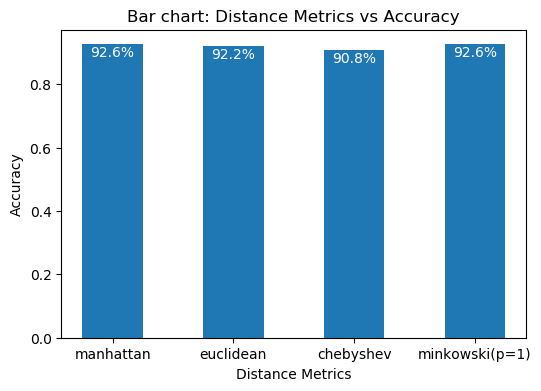

In [107]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

def label_bars(ax, bars, text_format, **kwargs):
    """
    Attaches a label on every bar of a regular or horizontal bar chart
    """
    ys = [bar.get_y() for bar in bars]
    y_is_constant = all(y == ys[0] for y in ys)  # -> regular bar chart, since all all bars start on the same y level (0)

    if y_is_constant:
        _label_bar(ax, bars, text_format, **kwargs)
    else:
        _label_barh(ax, bars, text_format, **kwargs)



def _label_bar(ax, bars, text_format, **kwargs):
    """
    Attach a text label to each bar displaying its y value
    """
    max_y_value = ax.get_ylim()[1]
    inside_distance = max_y_value * 0.05
    outside_distance = max_y_value * 0.01

    for bar in bars:
        text = text_format.format(bar.get_height())
        text_x = bar.get_x() + bar.get_width() / 2

        is_inside = bar.get_height() >= max_y_value * 0.15
        if is_inside:
            color = "white"
            text_y = bar.get_height() - inside_distance
        else:
            color = "black"
            text_y = bar.get_height() + outside_distance

        ax.text(text_x, text_y, text, ha='center', va='bottom', color=color, **kwargs)
        ax.set(xlabel='Distance Metrics', ylabel='Accuracy', title='Bar chart: Distance Metrics vs Accuracy')

def _label_barh(ax, bars, text_format, **kwargs):
    """
    Attach a text label to each bar displaying its y value
    Note: label always outside. otherwise it's too hard to control as numbers can be very long
    """
    max_x_value = ax.get_xlim()[1]
    distance = max_x_value * 0.0025

    for bar in bars:
        text = text_format.format(bar.get_width())

        text_x = bar.get_width() + distance
        text_y = bar.get_y() + bar.get_height() / 2

        ax.text(text_x, text_y, text, va='center', **kwargs)
        ax.set(xlabel='Distance Metrics', ylabel='Accuracy', title='Bar chart: Distance Metrics vs Accuracy')

objects = ['manhattan','euclidean','chebyshev','minkowski(p=1)']
y_pos = np.arange(len(objects))
performance=[]
for i in model_knn_data2:
    performance.append(i['Train_Accuracy'])

#plt.bar(y_pos, performance, align='center', alpha=0.5)
#plt.xticks(y_pos, objects)
#plt.ylabel('Accuracy')
#plt.title('Metrics')

fig10, ax10 = plt.subplots(figsize=(6, 4))
bars = ax10.bar(objects, performance, width=0.5, align="center")
value_format = "{:.1%}"  # displaying values as percentage with one fractional digit
label_bars(ax10, bars, value_format)

#for index,data in enumerate(performance):
#    plt.text(x=index , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=8))
#plt.tight_layout()
#plt.show()

In [126]:
no_neighbors=[2,4,6,8,10,12,14,16,18,20]
model_knn_data=[]
for i in no_neighbors:
    parameters_knn={}
    model_knn,train_time=KNN(train_X1,train_y1,i,'manhattan')
    parameters_knn['Train_Time']=train_time
    parameters_knn['Train_Accuracy']=model_knn.score(train_X1,train_y1)
    parameters_knn['Train_Error']=1-parameters_knn['Train_Accuracy']
    parameters_knn['Test_Accuracy']=model_knn.score(test_X1,test_y1)
    parameters_knn['Test_Error']=1-parameters_knn['Test_Accuracy']
    parameters_knn['No_Neighbors']=i
    model_knn_data.append(parameters_knn)
    

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

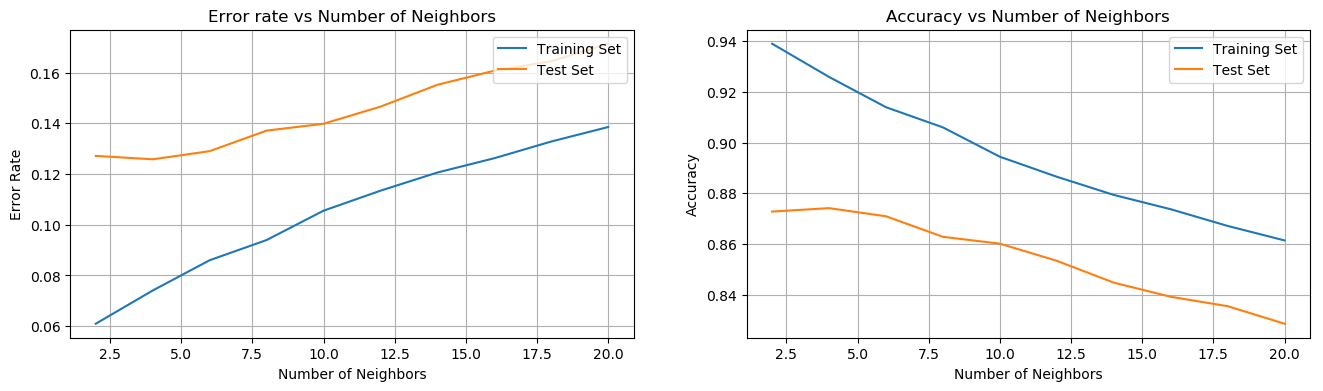

In [127]:
from matplotlib import pyplot as plt
TrainingError_knn=[]
TestingError_knn=[]
TrainingAccuracy_knn=[]
TestingAccuracy_knn=[]
for i in model_knn_data:
    TrainingError_knn.append(i["Train_Error"])
    TestingError_knn.append(i["Test_Error"])
    TrainingAccuracy_knn.append(i["Train_Accuracy"])
    TestingAccuracy_knn.append(i["Test_Accuracy"])
    
fig1, ax1 = plt.subplots(nrows=1, ncols=2, figsize=(16,4))

ax1[0].plot(no_neighbors, TrainingError_knn, label='Training Set')
ax1[0].plot(no_neighbors, TestingError_knn, label='Test Set')
ax1[0].set(xlabel='Number of Neighbors', ylabel='Error Rate', title='Error rate vs Number of Neighbors')
ax1[0].grid()
ax1[0].legend(loc='upper right')

ax1[1].plot(no_neighbors, TrainingAccuracy_knn, label='Training Set')
ax1[1].plot(no_neighbors, TestingAccuracy_knn, label='Test Set')
ax1[1].set(xlabel='Number of Neighbors', ylabel='Accuracy', title='Accuracy vs Number of Neighbors')
ax1[1].grid()
ax1[1].legend(loc='upper right')


In [110]:
split=[1.0,0.8,0.6,0.4,0.2]
model_knn_data1=[]
for j in split:
    parameters_knn1={}
    trained_knn=pd.concat([train_X1, train_y1], axis = 1)
    tested_knn=pd.concat([test_X1,test_y1],axis=1)
    trained_knn=trained_knn.sample(frac=j, random_state=1)
    tested_knn=tested_knn.sample(frac=j, random_state=1)
    trained_knn_y=trained_knn['Appliances']
    del trained_knn['Appliances']
    trained_knn_X=trained_knn
    tested_knn_y=tested_knn['Appliances']
    del tested_knn['Appliances']
    tested_knn_X=tested_knn
    model_knn1, train_time1 = KNN(trained_knn_X,trained_knn_y,5,'manhattan')
    parameters_knn1['Train_Time']=train_time1
    parameters_knn1['Train_Accuracy']=model_knn1.score(trained_knn_X,trained_knn_y)
    parameters_knn1['Train_Error']=1-parameters_knn1['Train_Accuracy']
    parameters_knn1['Test_Accuracy']=model_knn1.score(tested_knn_X,tested_knn_y)
    parameters_knn1['Test_Error']=1-parameters_knn1['Test_Accuracy']
    model_knn_data1.append(parameters_knn1)

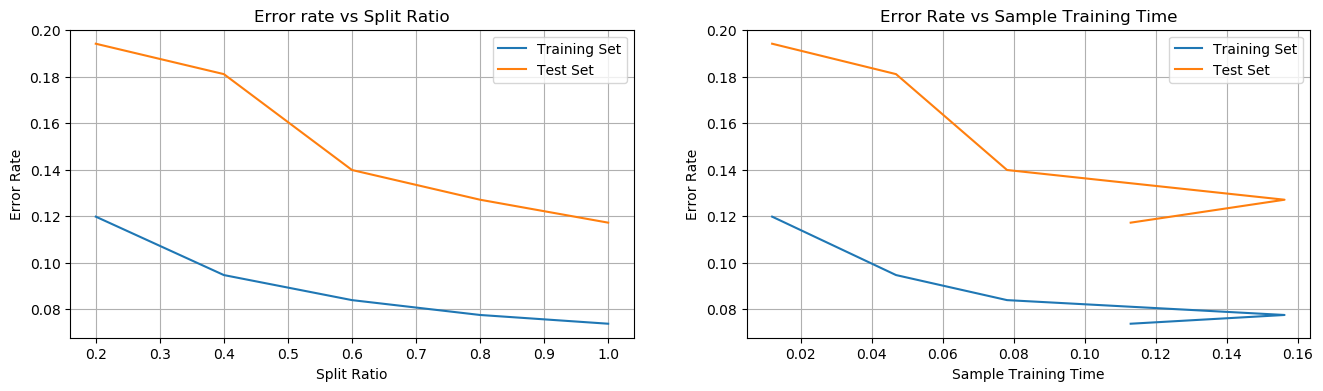

In [111]:
from matplotlib import pyplot as plt
TrainingError_knn1=[]
TestingError_knn1=[]
TrainingTime_knn1=[]
for i in model_knn_data1:
    TrainingError_knn1.append(i["Train_Error"])
    TestingError_knn1.append(i["Test_Error"])
    TrainingTime_knn1.append(i["Train_Time"])

    
fig2, ax2 = plt.subplots(nrows=1, ncols=2, figsize=(16,4))

ax2[0].plot(split, TrainingError_knn1, label='Training Set')
ax2[0].plot(split, TestingError_knn1, label='Test Set')
ax2[0].set(xlabel='Split Ratio', ylabel='Error Rate', title='Error rate vs Split Ratio')
ax2[0].grid()
ax2[0].legend(loc='upper right')

ax2[1].plot(TrainingTime_knn1, TrainingError_knn1, label='Training Set')
ax2[1].plot(TrainingTime_knn1, TestingError_knn1, label='Test Set')
ax2[1].set(xlabel='Sample Training Time', ylabel='Error Rate', title='Error Rate vs Sample Training Time')
ax2[1].grid()
ax2[1].legend(loc='upper right')


In [112]:
from sklearn.neural_network import MLPClassifier

def NeuralNetwork(X_train,y_train,activation_function,iterations,layers):
    model_NN= MLPClassifier( random_state=100, activation=activation_function, max_iter=iterations,hidden_layer_sizes=layers )
    start=time.time()
    model_NN=model_NN.fit(X_train,y_train)
    end=time.time()
    Diff=end-start
    return model_NN,Diff

In [113]:
iterations=[200,250,300,350,400]
model_nn_data=[]
for i in iterations:
    parameters_nn={}
    model_nn,train_time3=NeuralNetwork(train_X1,train_y1,'relu',i,(100,))
    parameters_nn['Train_Accuracy']=model_nn.score(train_X1,train_y1)
    parameters_nn['Train_Error']=1-parameters_nn['Train_Accuracy']
    parameters_nn['Test_Accuracy']=model_nn.score(test_X1,test_y1)
    parameters_nn['Test_Error']=1-parameters_nn['Test_Accuracy']
    model_nn_data.append(parameters_nn)

E:\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
E:\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  % self.max_it

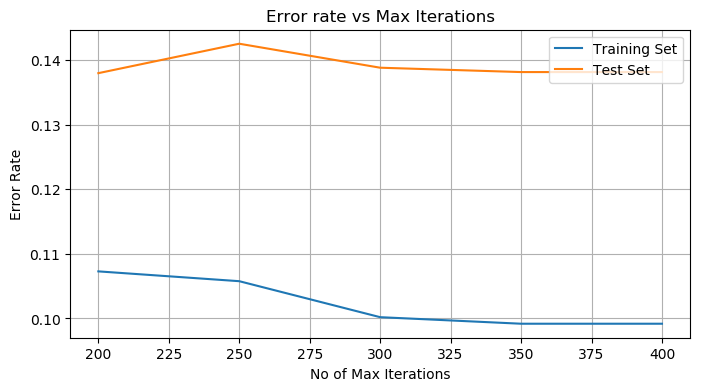

In [114]:
from matplotlib import pyplot as plt
TrainingError_nn=[]
TestingError_nn=[]

for i in model_nn_data:
    TrainingError_nn.append(i["Train_Error"])
    TestingError_nn.append(i["Test_Error"])


fig3, ax3 = plt.subplots(nrows=1, ncols=1, figsize=(8,4))

ax3.plot(iterations, TrainingError_nn, label='Training Set')
ax3.plot(iterations, TestingError_nn, label='Test Set')
ax3.set(xlabel='No of Max Iterations', ylabel='Error Rate', title='Error rate vs Max Iterations')
ax3.grid()
ax3.legend(loc='upper right')

In [115]:
Layers=[100]
Num_Layers=[1,2,3,4,5]
model_nn_data1=[]
for i in Num_Layers:
    parameters_nn1={}
    model_nn1,train_time4=NeuralNetwork(train_X1,train_y1,'relu',300,i*Layers)
    parameters_nn1['Train_Accuracy']=model_nn1.score(train_X1,train_y1)
    parameters_nn1['Train_Error']=1-parameters_nn1['Train_Accuracy']
    parameters_nn1['Test_Accuracy']=model_nn1.score(test_X1,test_y1)
    parameters_nn1['Test_Error']=1-parameters_nn1['Test_Accuracy']
    model_nn_data1.append(parameters_nn1)

E:\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
E:\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

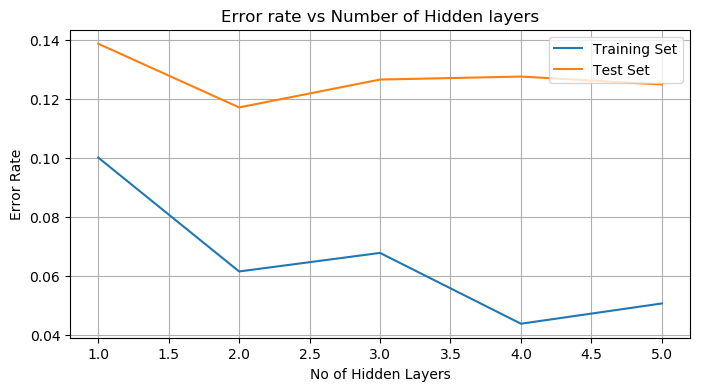

In [116]:
from matplotlib import pyplot as plt
TrainingError_nn1=[]
TestingError_nn1=[]

for i in model_nn_data1:
    TrainingError_nn1.append(i["Train_Error"])
    TestingError_nn1.append(i["Test_Error"])


fig4, ax4 = plt.subplots(nrows=1, ncols=1, figsize=(8,4))

ax4.plot(Num_Layers, TrainingError_nn1, label='Training Set')
ax4.plot(Num_Layers, TestingError_nn1, label='Test Set')
ax4.set(xlabel='No of Hidden Layers', ylabel='Error Rate', title='Error rate vs Number of Hidden layers')
ax4.grid()
ax4.legend(loc='upper right')

In [117]:
Num_Nodes=[50,100,150,200,250]
model_nn_data2=[]
for i in Num_Nodes:
    parameters_nn2={}
    No_Layers=[i,i,i,i]
    model_nn2,train_time5=NeuralNetwork(train_X1,train_y1,'relu',300,No_Layers)
    parameters_nn2['Train_Accuracy']=model_nn2.score(train_X1,train_y1)
    parameters_nn2['Train_Error']=1-parameters_nn2['Train_Accuracy']
    parameters_nn2['Test_Accuracy']=model_nn2.score(test_X1,test_y1)
    parameters_nn2['Test_Error']=1-parameters_nn2['Test_Accuracy']
    model_nn_data2.append(parameters_nn2)

E:\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

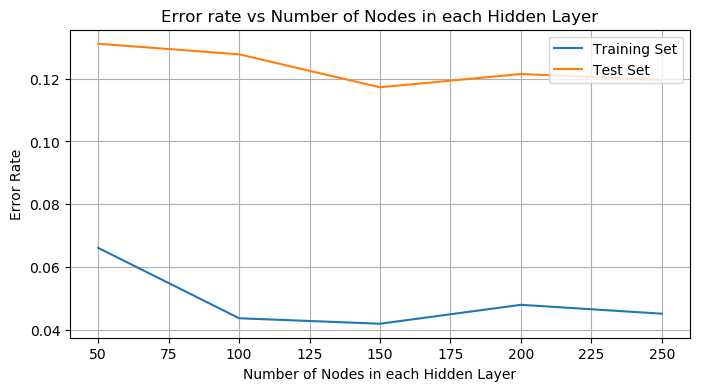

In [118]:
from matplotlib import pyplot as plt
TrainingError_nn2=[]
TestingError_nn2=[]

for i in model_nn_data2:
    TrainingError_nn2.append(i["Train_Error"])
    TestingError_nn2.append(i["Test_Error"])


fig5, ax5 = plt.subplots(nrows=1, ncols=1, figsize=(8,4))

ax5.plot(Num_Nodes, TrainingError_nn2, label='Training Set')
ax5.plot(Num_Nodes, TestingError_nn2, label='Test Set')
ax5.set(xlabel='Number of Nodes in each Hidden Layer', ylabel='Error Rate', title='Error rate vs Number of Nodes in each Hidden Layer')
ax5.grid()
ax5.legend(loc='upper right')

In [119]:
split=[1,0.9,0.8,0.7,0.6]
model_ann_data=[]
for j in split:
    parameters_ann={}
    trained_ann=pd.concat([train_X1, train_y1], axis = 1)
    tested_ann=pd.concat([test_X1,test_y1],axis=1)
    trained_ann=trained_ann.sample(frac=j, random_state=1)
    tested_ann=tested_ann.sample(frac=j, random_state=1)
    trained_ann_y=trained_ann['Appliances']
    del trained_ann['Appliances']
    trained_ann_X=trained_ann
    tested_ann_y=tested_ann['Appliances']
    del tested_ann['Appliances']
    tested_ann_X=tested_ann
    model_ann, train_time6 = NeuralNetwork(trained_ann_X,trained_ann_y,'relu',300,[150,150,150,150])
    parameters_ann['Train_Time']=train_time6
    parameters_ann['Train_Accuracy']=model_ann.score(trained_ann_X,trained_ann_y)
    parameters_ann['Train_Error']=1-parameters_ann['Train_Accuracy']
    parameters_ann['Test_Accuracy']=model_ann.score(tested_ann_X,tested_ann_y)
    parameters_ann['Test_Error']=1-parameters_ann['Test_Accuracy']
    model_ann_data.append(parameters_ann)
    print(parameters_ann)

{'Train_Time': 84.51511883735657, 'Train_Accuracy': 0.9548284349210946, 'Train_Error': 0.04517156507890541, 'Test_Accuracy': 0.8789055902719135, 'Test_Error': 0.1210944097280865}
{'Train_Time': 118.46962761878967, 'Train_Accuracy': 0.9679079868092978, 'Train_Error': 0.03209201319070221, 'Test_Accuracy': 0.8755864139613436, 'Test_Error': 0.12441358603865638}
{'Train_Time': 58.64763593673706, 'Train_Accuracy': 0.9571984435797666, 'Train_Error': 0.04280155642023342, 'Test_Accuracy': 0.871859826894659, 'Test_Error': 0.12814017310534098}
{'Train_Time': 78.49763751029968, 'Train_Accuracy': 0.9664943123061014, 'Train_Error': 0.03350568769389861, 'Test_Accuracy': 0.8714113389626056, 'Test_Error': 0.12858866103739441}
{'Train_Time': 74.59331679344177, 'Train_Accuracy': 0.9722490347490348, 'Train_Error': 0.02775096525096521, 'Test_Accuracy': 0.8649028989586265, 'Test_Error': 0.1350971010413735}


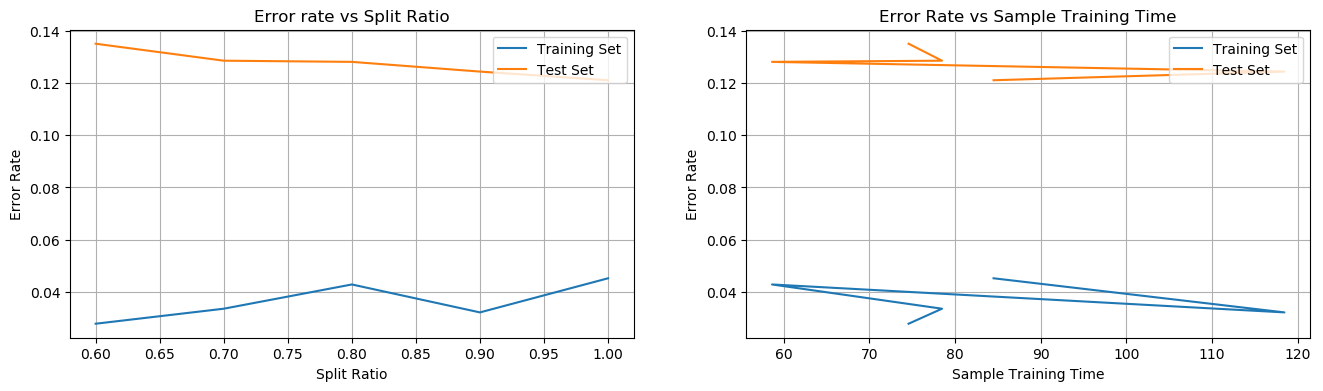

In [120]:
from matplotlib import pyplot as plt
TrainingError_ann=[]
TestingError_ann=[]
TrainingTime_ann=[]
for i in model_ann_data:
    TrainingError_ann.append(i["Train_Error"])
    TestingError_ann.append(i["Test_Error"])
    TrainingTime_ann.append(i["Train_Time"])

    
fig6, ax6 = plt.subplots(nrows=1, ncols=2, figsize=(16,4))

ax6[0].plot(split, TrainingError_ann, label='Training Set')
ax6[0].plot(split, TestingError_ann, label='Test Set')
ax6[0].set(xlabel='Split Ratio', ylabel='Error Rate', title='Error rate vs Split Ratio')
ax6[0].grid()
ax6[0].legend(loc='upper right')

ax6[1].plot(TrainingTime_ann, TrainingError_ann, label='Training Set')
ax6[1].plot(TrainingTime_ann, TestingError_ann, label='Test Set')
ax6[1].set(xlabel='Sample Training Time', ylabel='Error Rate', title='Error Rate vs Sample Training Time')
ax6[1].grid()
ax6[1].legend(loc='upper right')

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
E:\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9263066454321702
0.9579412190531345


E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please cha

{'fit_time': array([0.08394623, 0.09374571, 0.06995559, 0.06963277, 0.06895614,
       0.06596017, 0.21086955, 0.10793185, 0.07195568, 0.07595205]), 'score_time': array([0.47822309, 0.39449835, 0.36477447, 0.36177874, 0.35877919,
       0.35178185, 0.62860847, 0.39975309, 0.38276315, 0.40374875]), 'test_score': array([0.8922632 , 0.88205499, 0.89435601, 0.88559015, 0.88196959,
       0.87762491, 0.8884866 , 0.88196959, 0.87328023, 0.89283128]), 'train_score': array([0.9222106 , 0.92414736, 0.92269949, 0.92230355, 0.92222312,
       0.92310786, 0.92439476, 0.92455562, 0.92487734, 0.92455562])}
{'fit_time': array([ 72.32222986,  61.29297304,  74.39791203,  75.69137239,
        70.72902822, 105.86707163,  70.93327403,  77.22682405,
       121.88762736, 100.37457657]), 'score_time': array([0.02098465, 0.0209825 , 0.01998615, 0.02298331, 0.02098536,
       0.03298068, 0.01998281, 0.01998496, 0.02398443, 0.02798271]), 'test_score': array([0.88286334, 0.87698987, 0.86975398, 0.8826937 , 0.881

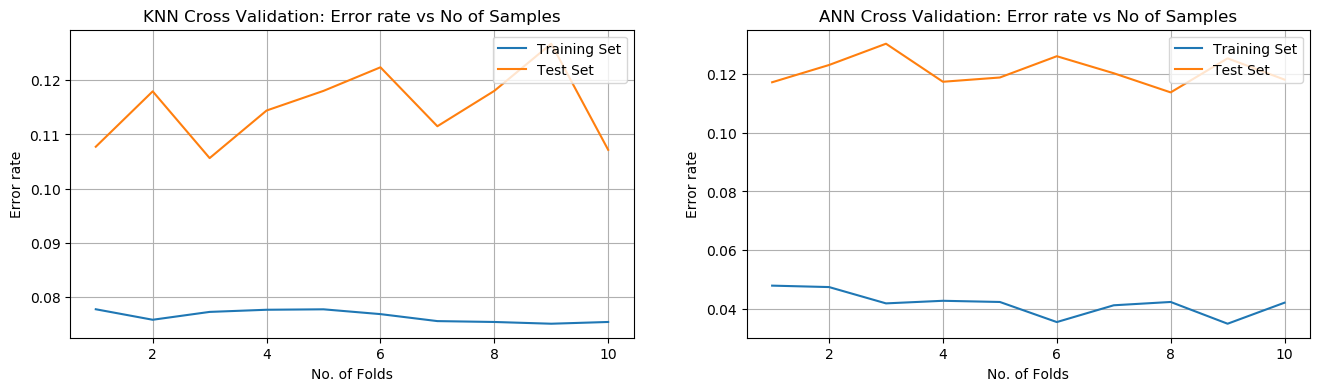

In [121]:
# Cross Validation function
from sklearn.model_selection import cross_validate

def CV(model,x,Y,folds):
    cv_results = cross_validate(model,x,Y,cv=folds, return_train_score = True)
    return(cv_results)

model_knn11, train_time11 = KNN(train_X1,train_y1,5,'manhattan')
model_knn12, train_time12 = NeuralNetwork(train_X1,train_y1,'relu',300,[150,150,150,150])
Accuracy_KNN=model_knn11.score(train_X1,train_y1)
Accuracy_ANN=model_knn12.score(train_X1,train_y1)
print(Accuracy_KNN)
print(Accuracy_ANN)

folds=[1,2,3,4,5,6,7,8,9,10]
Cross_Validation_data= CV(model_knn11,train_X1,train_y1,10)
Cross_Validation_data1= CV(model_knn12,train_X1,train_y1,10)
print(Cross_Validation_data)
print(Cross_Validation_data1)
Cross_Validation_Train_Error=[]
Cross_Validation_Test_Error=[]
Cross_Validation_Train_Error1=[]
Cross_Validation_Test_Error1=[]

for i  in Cross_Validation_data["train_score"]:
    Cross_Validation_Train_Error.append(1-i)

for i  in Cross_Validation_data["test_score"]:
    Cross_Validation_Test_Error.append(1-i)
    
for i  in Cross_Validation_data1["train_score"]:
    Cross_Validation_Train_Error1.append(1-i)

for i  in Cross_Validation_data1["test_score"]:
    Cross_Validation_Test_Error1.append(1-i)
    
#Cross_Validation_Train_Error=Cross_Validation_data["train_score"]
#Cross_Validation_Test_Error=Cross_Validation_data["test_score"]

fig11, ax11 = plt.subplots(nrows=1, ncols=2, figsize=(16,4))

ax11[0].plot(folds, Cross_Validation_Train_Error, label='Training Set')
ax11[0].plot(folds, Cross_Validation_Test_Error,label='Test Set')
ax11[0].set(xlabel='No. of Folds', ylabel='Error rate', title='KNN Cross Validation: Error rate vs No of Samples')
ax11[0].grid()
ax11[0].legend(loc='upper right')

ax11[1].plot(folds, Cross_Validation_Train_Error1, label='Training Set')
ax11[1].plot(folds, Cross_Validation_Test_Error1,label='Test Set')
ax11[1].set(xlabel='No. of Folds', ylabel='Error rate', title='ANN Cross Validation: Error rate vs No of Samples')
ax11[1].grid()
ax11[1].legend(loc='upper right')